## Import the standard libraries

In [2]:
# Importing standard packages
import pandas as pd
from IPython.display import display_html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Ellipse
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
df = pd.read_csv(r"D:\WORK\IOD\MINI PROJ 3\singapore_airlines_reviews.csv")
df

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [6]:
df.columns

Index(['published_date', 'published_platform', 'rating', 'type', 'text',
       'title', 'helpful_votes'],
      dtype='object')

## Check for duplicates

In [8]:
df.duplicated().sum()

0

## Check for null values 

In [10]:
df.isna().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 1
helpful_votes         0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

published_date        0
published_platform    0
rating                0
type                  0
text                  0
title                 0
helpful_votes         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      9999 non-null   object
 1   published_platform  9999 non-null   object
 2   rating              9999 non-null   int64 
 3   type                9999 non-null   object
 4   text                9999 non-null   object
 5   title               9999 non-null   object
 6   helpful_votes       9999 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 624.9+ KB


## Convert data time to proper format

In [15]:
df.loc[:, 'published_date'] = pd.to_datetime(df['published_date'], utc=True).dt.tz_localize(None)

In [16]:
df.sample(5)

,published_date,published_platform,rating,type,text,title,helpful_votes
9545,2018-09-13 07:16:03,Desktop,4,review,Singapore airlines offers the best route from ...,Adelaide to Colombo,0
1871,2020-02-12 04:29:54,Mobile,3,review,Oh! Never again to take this route. 5.20AM tak...,Schedule is bruttal,2
5366,2019-05-24 00:10:37,Desktop,5,review,"We had a flight at May 16, SQ 361. And here is...",Perfect Airlines to fly with,0
5822,2019-04-20 19:19:21,Mobile,2,review,I wonder if my seating had been short changed ...,Bought on spontaneous points but given seats c...,1
807,2022-09-15 12:55:34,Desktop,4,review,Seat 33D. The extra room over an economy seat ...,Premium Economy not worth the money,1


In [17]:
df.loc[:, 'year'] = df['published_date'].astype(str).str[:4]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      9999 non-null   object
 1   published_platform  9999 non-null   object
 2   rating              9999 non-null   int64 
 3   type                9999 non-null   object
 4   text                9999 non-null   object
 5   title               9999 non-null   object
 6   helpful_votes       9999 non-null   int64 
 7   year                9999 non-null   object
dtypes: int64(2), object(6)
memory usage: 703.1+ KB


## Distribution of ratings

In [20]:
rating_count = df['rating'].value_counts()

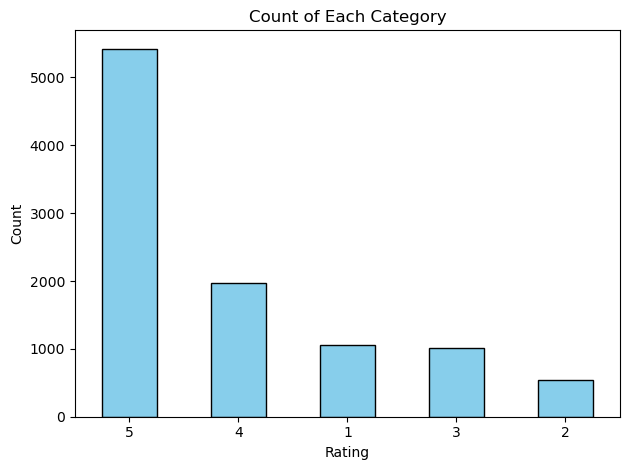

In [21]:
# Plot as bar chart
rating_count.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Each Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Timeline of ratings

In [23]:
print(pd.__version__)

2.2.2


In [24]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [25]:
df['year'].value_counts()

year
2019    5202
2018    2618
2020     911
2022     552
2023     535
2024      96
2021      85
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      9999 non-null   object
 1   published_platform  9999 non-null   object
 2   rating              9999 non-null   int64 
 3   type                9999 non-null   object
 4   text                9999 non-null   object
 5   title               9999 non-null   object
 6   helpful_votes       9999 non-null   int64 
 7   year                9999 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 703.1+ KB


In [27]:
df.groupby('year')['rating'].count()

year
2018    2618
2019    5202
2020     911
2021      85
2022     552
2023     535
2024      96
Name: rating, dtype: int64

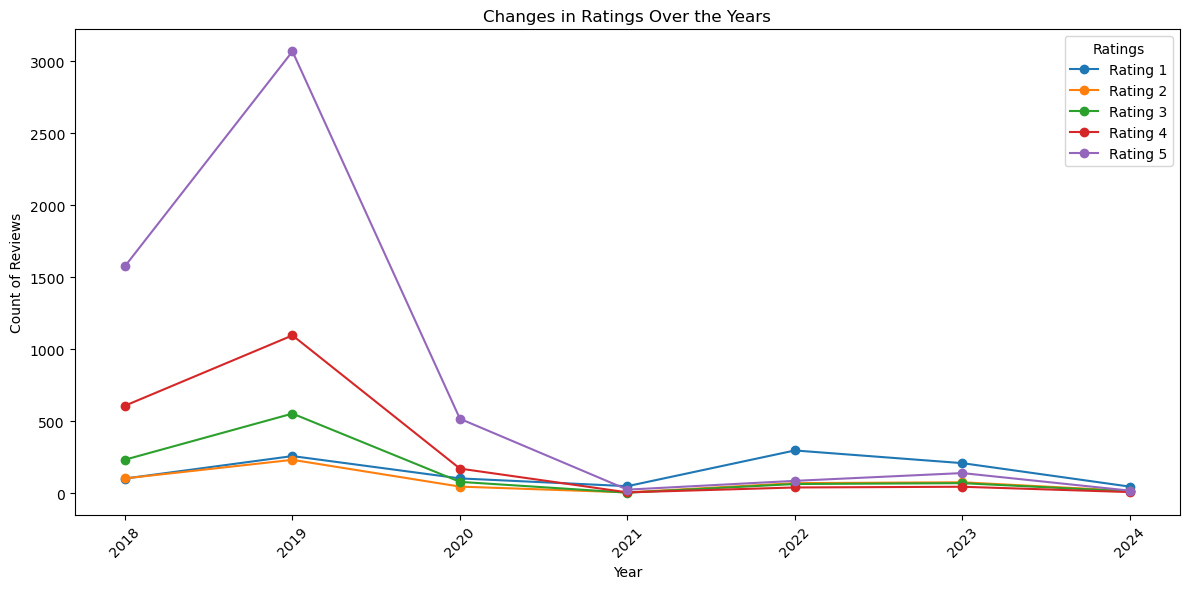

In [28]:
# Step 1: Group by 'year' and 'rating' and count the occurrences
rating_counts = df.groupby(['year', 'rating']).size().unstack(fill_value=0)

# Step 2: Plot the data
# Create a plot with one line per rating (1 through 5)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each rating (1 to 5) as a separate line
for rating in range(1, 6):
    ax.plot(rating_counts.index, rating_counts[rating], label=f'Rating {rating}', marker='o')

# Add titles and labels
ax.set_title('Changes in Ratings Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Reviews')
ax.legend(title='Ratings')

# Rotate x-axis labels if necessary for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [29]:
type(rating_counts[1])

pandas.core.series.Series

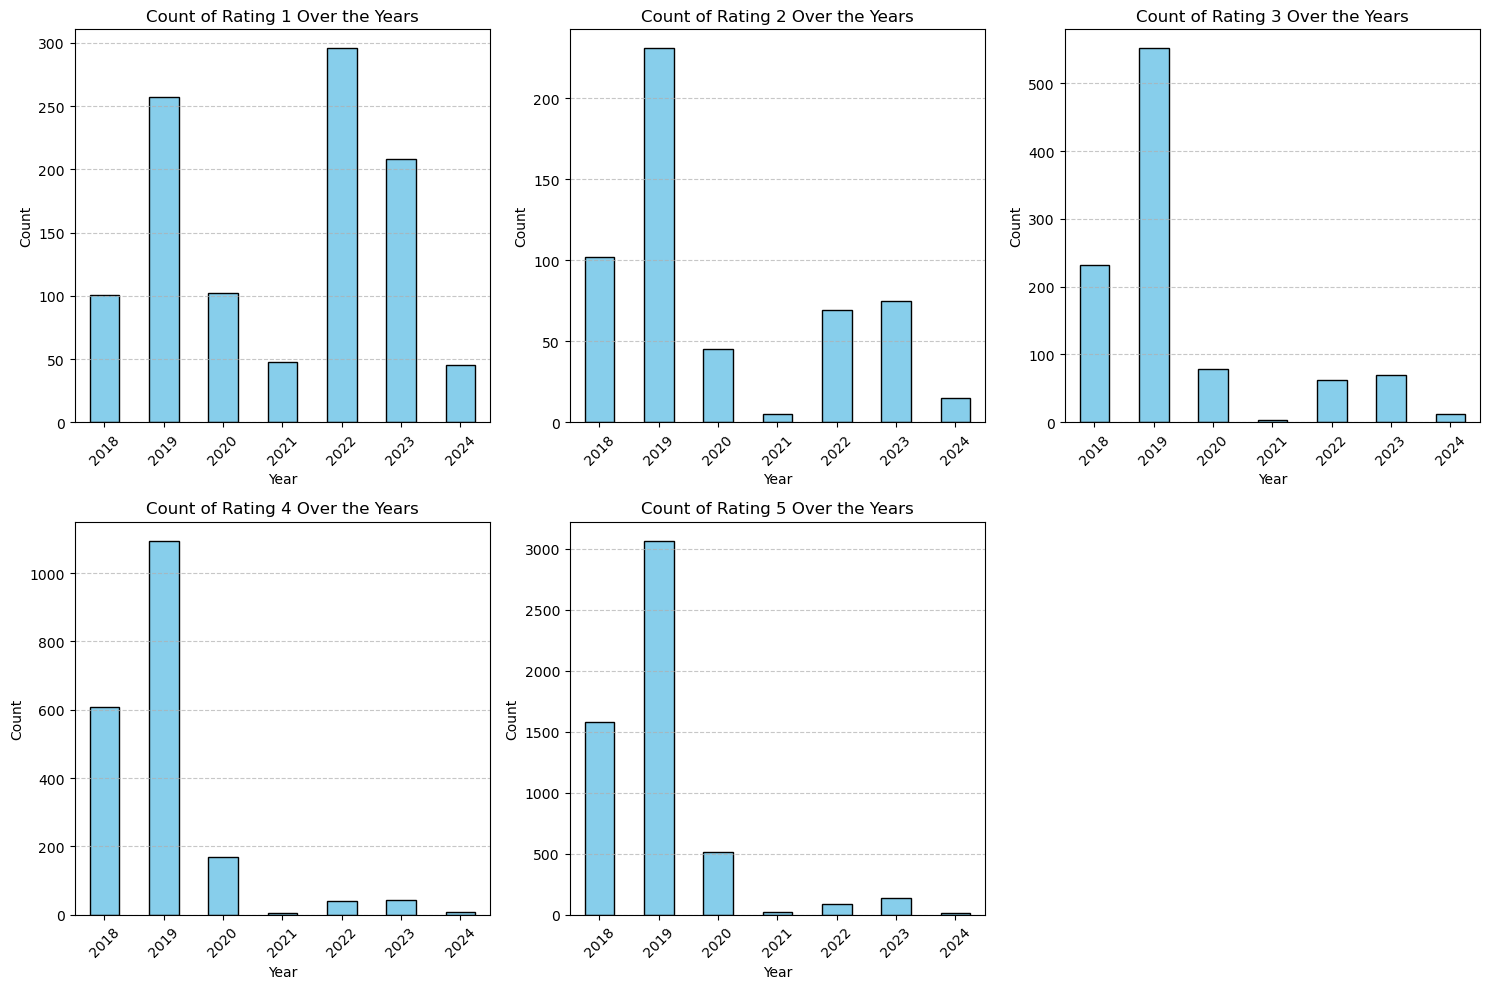

In [30]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2D axes array to make it easier to loop over
axes = axes.flatten()

# Loop through ratings 1 to 5
for i, rating in enumerate(range(1, 6)):
    ax = axes[i]  # Get the correct subplot axis

    # Plot the series as a bar chart
    rating_counts[rating].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

    # Customize the subplot
    ax.set_title(f'Count of Rating {rating} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticklabels(rating_counts.index, rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Hide the last empty subplot (bottom right corner)
axes[5].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Check for the different types of feedback

In [32]:
df['type'].unique()

array(['review'], dtype=object)

## Cleaning the text data

In [34]:
!pip install langdetect

In [35]:
import regex as re
import spacy
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [36]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 12.2 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 11.9 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 11.8 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 11.7 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 11.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
df.head(3)

,published_date,published_platform,rating,type,text,title,helpful_votes,year
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024
2,2024-03-11 16:20:23,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,2024


In [39]:
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

df['language'] = df['text'].apply(safe_detect)

# Check the counts before filtering
print(df['language'].value_counts())

# Now filter only English and drop 'language'
df = df[df['language'] == 'en'].drop(columns='language').reset_index(drop=True)

language
en    9998
th       1
Name: count, dtype: int64


In [40]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024
2,2024-03-11 16:20:23,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,2024
3,2024-03-11 11:12:27,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,2024
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024
...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1,2018
9995,2018-08-06 02:47:06,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,2018
9996,2018-08-06 00:32:03,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2,2018


In [41]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)
    # Remove non-English characters (leave only a-z, A-Z, and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    return text

In [42]:
# Apply the clean_text function to your dataset.
# ANSWER
df['text'] = df['text'].apply(clean_text)
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024
...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018


In [43]:
def convert_text(text):
    sent = nlp(text)
    ents = {x.text: x for x in sent.ents}
    tokens = []
    for w in sent:
        if w.is_stop or w.is_punct or w.is_digit:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text = ' '.join(tokens)

    return text

In [44]:
%%time
df['clean_text'] = df['text'].apply(convert_text)

CPU times: total: 2min 13s
Wall time: 2min 19s


In [45]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024,airline Singapore London heathrow issue ticket...
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024,service singapore airlines suites class excell...
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024,booked pay receive email confirmation extra le...
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024,best airline world seat food service brilliant...
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024,premium economy seating singapore airlines nar...
...,...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018,Singapore airlines acceptable comfort level ...
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018,great flight singapore air great unique servic...
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018,fly business class Frankfurt Singapore Brisban...
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018,aircraft spotlessly present boarding Carpets c...


## Convert ratings into binary

In [47]:
def map_sentiment_class(rating):
    if rating in [1, 2]:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

# Apply the function to create a new column
df['sentiment_class'] = df['rating'].apply(map_sentiment_class)

In [48]:
sentiment_dict = {0 : "Negative", 1 : "Neutral", 2: "Positive"}
sentiment_dict

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}

In [49]:
df.sample(10)

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text,sentiment_class
307,2023-07-05 11:05:13,Desktop,2,review,The stewards onboard the flight from singapore...,Poor inflight service not expected from Singap...,0,2023,steward onboard flight singapore london offer ...,0
8727,2018-10-10 22:32:47,Mobile,5,review,Flew on new A aircraft from Cape Town to Jakar...,New aircraft nice flight,0,2018,fly new aircraft cape town Jakarta transit Joh...,2
8988,2018-09-24 15:58:37,Mobile,1,review,Seats are terrible small hard and uncomfortabl...,Fly either standard economy or business,4,2018,seat terrible small hard uncomfortable Vegetar...,0
7545,2018-12-20 10:58:46,Desktop,3,review,Took business class with my family of AC from ...,Stewardess in Business Class not friendly at all!,0,2018,took business class family AC Perth Singapore ...,1
8389,2018-11-05 19:16:30,Desktop,4,review,Everything is superb Excellent service luxurio...,The greatest airline I have ever flown,1,2018,superb excellent service luxurious comfortable...,2
3699,2019-09-09 22:55:59,Desktop,5,review,The new seat is very comfortable and quite a g...,Comfortable and lots of movies variety,1,2019,new seat comfortable good leg space screen big...,2
852,2022-08-24 02:34:54,Desktop,1,review,I sent a private complaint over weeks ago and...,AVOID - solo traveller left stranded with no help,0,2022,send private complaint week ago not response...,0
5943,2019-04-11 05:55:21,Desktop,3,review,Travelled on the older which needs refurbishm...,Standards have slipped,0,2019,travel old need refurbishment pay extra exit...,1
7034,2019-01-27 08:33:42,Desktop,5,review,My wife and I were on our way home from a wee...,Attentive Cabin Crew,2,2019,wife way home week cruise vacation Indonesia...,2
1986,2020-01-24 09:34:53,Mobile,1,review,It appears that airlines flying into places li...,An old airplane,2,2020,appear airline fly place like Ahmedabad India ...,0


## Import the machine learning packages

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

### Split training and test data 

In [53]:
# Predictor variables / Features
X = df['clean_text']

# Target variable
y = df['sentiment_class']

# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## BoW and TF-IDF Vectorization

### Bag of Words Model

In [56]:
# Initialize Bag Of Words model
bow_model = CountVectorizer(max_features= 500)
X_train_bow = bow_model.fit_transform(X_train)  # Fit only on training data
X_test_bow = bow_model.transform(X_test)   

In [57]:
pd.DataFrame(X_train_bow.todense(), columns=bow_model.get_feature_names_out()).head()

,able,absolutely,access,accommodate,actually,add,additional,agent,ago,ahead,...,window,wine,wish,wonderful,work,world,worth,year,yes,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model

In [59]:
# Initialize TF-IDF model
tfidf_model = TfidfVectorizer(max_features= 500)
X_train_tfidf = tfidf_model.fit_transform(X_train)
X_test_tfidf = tfidf_model.transform(X_test)

In [60]:
X_train_tfidf.shape

(7998, 500)

## Classifiers 
1. Support Vector Machines
2. Decision Tree
3. Random Forest

# Using Bag of Words with our classifiers

### Support Vector Machine, Bag of Words

Accuracy: 0.8080
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65       327
           1       0.38      0.24      0.29       234
           2       0.89      0.93      0.91      1439

    accuracy                           0.81      2000
   macro avg       0.64      0.61      0.62      2000
weighted avg       0.79      0.81      0.80      2000

ROC AUC Score: 0.8693283909959034


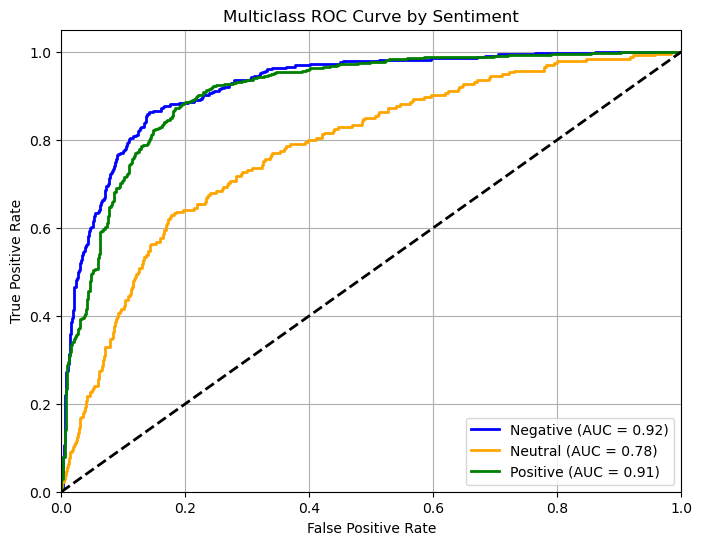

In [64]:
# 3. Train SVM classifier
svm_model = SVC(kernel='linear', probability= True)  # 'linear' works well for text data
svm_model.fit(X_train_bow, y_train)

# make predictions based on the test data
svm_y_predictions = svm_model.predict(X_test_bow)

# store probabilities of predictions being 1
#probabilities = classifier.predict_proba(B.todense())[:, 1]
svm_y_probabilities = svm_model.predict_proba(X_test_bow)

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, svm_y_predictions))

svm_report = classification_report(y_test, svm_y_predictions)
print("Classification Report:\n", svm_report)

roc_auc = roc_auc_score(y_test, svm_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], svm_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Decision Tree, Bag of Words

Accuracy: 0.7385
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55       327
           1       0.23      0.20      0.21       234
           2       0.85      0.87      0.86      1439

    accuracy                           0.74      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.73      0.74      0.73      2000

ROC AUC Score: 0.674048694447445


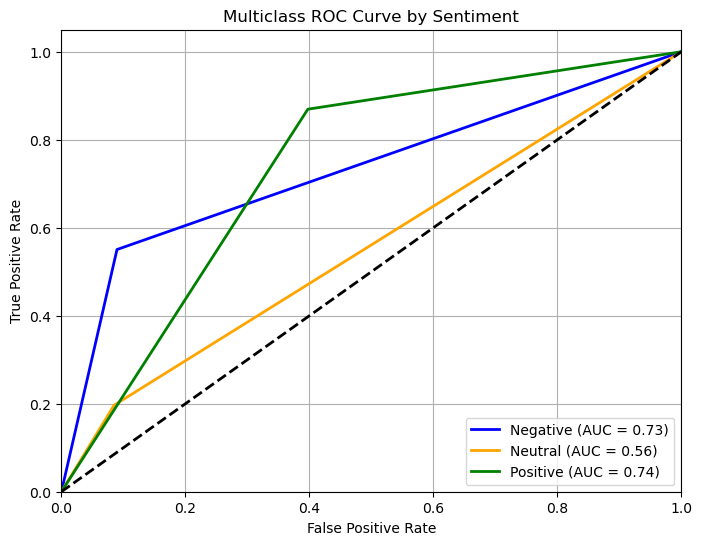

In [66]:
# Initialize the decision tree classifier
decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(X_train_bow, y_train)

# make predictions based on the test data
dt_y_predictions = decision_model.predict(X_test_bow)

# store probabilities of predictions being 1
#probabilities = classifier.predict_proba(B.todense())[:, 1]
dt_y_probabilities = decision_model.predict_proba(X_test_bow)

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, dt_y_predictions))

dt_report = classification_report(y_test, dt_y_predictions)
print("Classification Report:\n", dt_report)

roc_auc = roc_auc_score(y_test, dt_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], dt_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Random Forest, Bag of Words

Accuracy: 0.8025
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       327
           1       0.50      0.01      0.03       234
           2       0.83      0.97      0.89      1439

    accuracy                           0.80      2000
   macro avg       0.67      0.54      0.52      2000
weighted avg       0.76      0.80      0.75      2000

ROC AUC Score: 0.8738853189583023


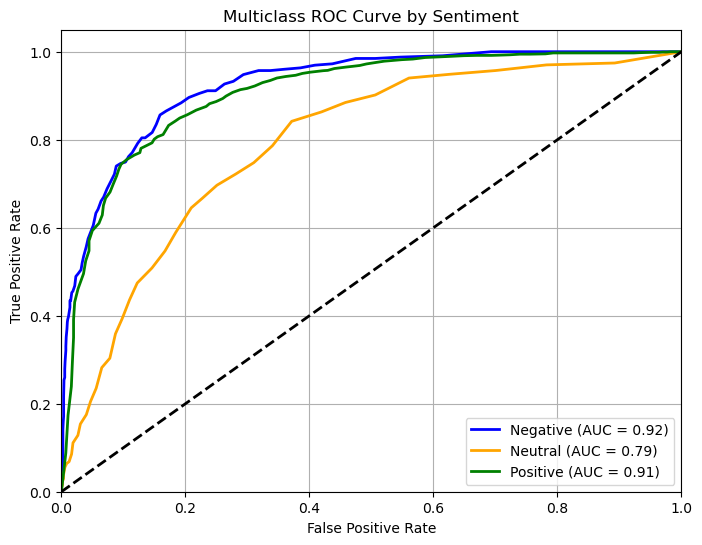

In [68]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit model
# Train the model
rf_model.fit(X_train_bow, y_train)

# Evaluate model against training set
rf_y_predictions = rf_model.predict(X_test_bow)
rf_y_probabilities = rf_model.predict_proba(X_test_bow)

rf_accuracy = accuracy_score(y_test, rf_y_predictions)
print("Accuracy:", rf_accuracy)

rf_report = classification_report(y_test, rf_y_predictions)
print("Classification Report:\n", rf_report)

roc_auc = roc_auc_score(y_test, rf_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Using TF-IDF with our classifiers

### Support Vector Machine, TF-IDF

Accuracy: 0.7245
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.03      0.06       327
           1       0.00      0.00      0.00       234
           2       0.72      1.00      0.84      1439

    accuracy                           0.72      2000
   macro avg       0.52      0.34      0.30      2000
weighted avg       0.66      0.72      0.61      2000

ROC AUC Score: 0.8596045149571226


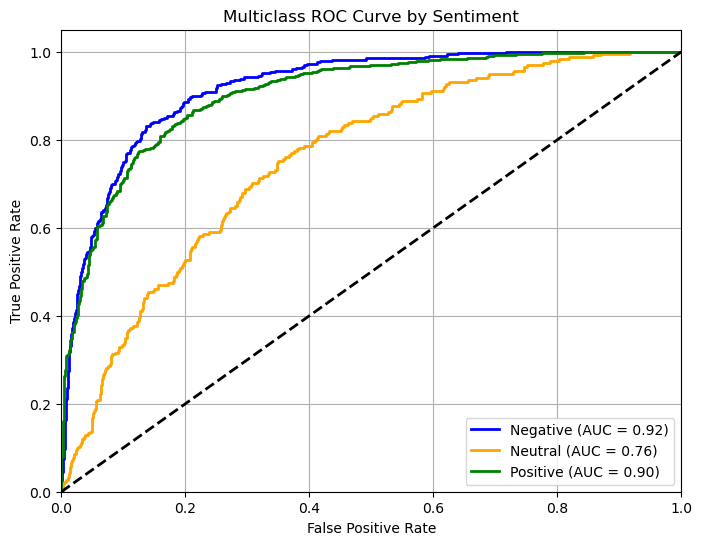

In [71]:
# 3. Train SVM classifier
tfidf_svm_model = SVC(kernel='linear', probability= True)  # 'linear' works well for text data
tfidf_svm_model.fit(X_train_tfidf, y_train)

# make predictions based on the test data
tfidf_svm_y_predictions = svm_model.predict(X_test_tfidf)

# store probabilities of predictions being 1
#probabilities = classifier.predict_proba(B.todense())[:, 1]
tfidf_svm_y_probabilities = svm_model.predict_proba(X_test_tfidf)

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, tfidf_svm_y_predictions))

tfidf_svm_report = classification_report(y_test, tfidf_svm_y_predictions)
print("Classification Report:\n", tfidf_svm_report)

roc_auc = roc_auc_score(y_test, tfidf_svm_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], tfidf_svm_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Decision Tree, TF-IDF

Accuracy: 0.7295
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       327
           1       0.24      0.19      0.21       234
           2       0.85      0.86      0.85      1439

    accuracy                           0.73      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.72      0.73      0.72      2000

ROC AUC Score: 0.6665600866789748


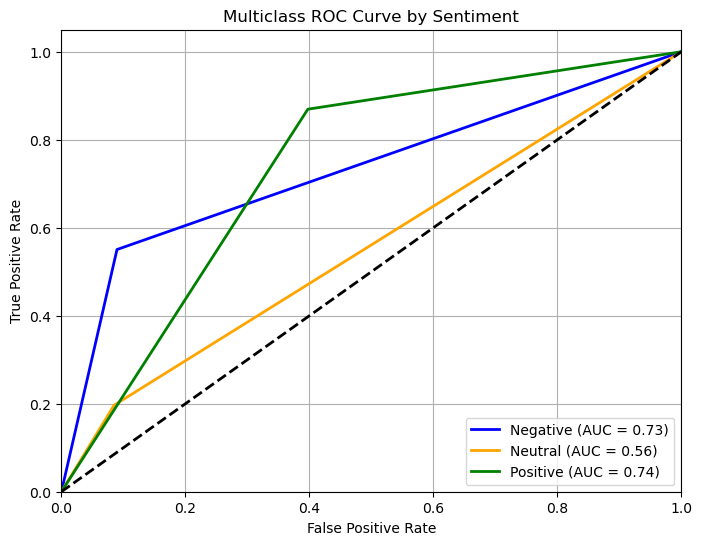

In [73]:
# Initialize the decision tree classifier
tfidf_decision_model = DecisionTreeClassifier(random_state=42)
tfidf_decision_model.fit(X_train_tfidf, y_train)

# make predictions based on the test data
tfidf_dt_y_predictions = tfidf_decision_model.predict(X_test_tfidf)

# store probabilities of predictions being 1
#probabilities = classifier.predict_proba(B.todense())[:, 1]
tfidf_dt_y_probabilities = tfidf_decision_model.predict_proba(X_test_tfidf)

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, tfidf_dt_y_predictions))

tfidf_dt_report = classification_report(y_test, tfidf_dt_y_predictions)
print("Classification Report:\n", tfidf_dt_report)

roc_auc = roc_auc_score(y_test, tfidf_dt_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], dt_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Random Forest, TF-IDF

Accuracy: 0.8025
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       327
           1       0.50      0.01      0.03       234
           2       0.83      0.97      0.89      1439

    accuracy                           0.80      2000
   macro avg       0.67      0.54      0.52      2000
weighted avg       0.76      0.80      0.75      2000

ROC AUC Score: 0.8806477076130927


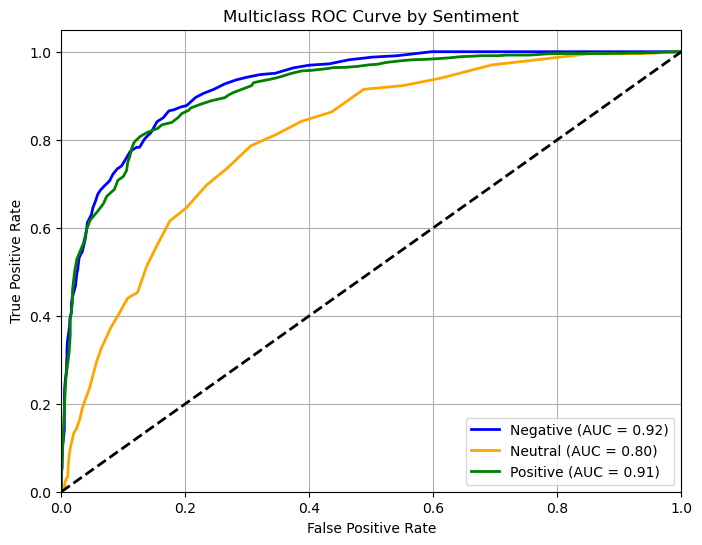

In [75]:
# Initialize the RandomForestClassifier
tfidf_rf_model = RandomForestClassifier(random_state=42)

# Fit model
# Train the model
tfidf_rf_model.fit(X_train_tfidf, y_train)

# Evaluate model against training set
tfidf_rf_y_predictions = tfidf_rf_model.predict(X_test_tfidf)
tfidf_rf_y_probabilities = tfidf_rf_model.predict_proba(X_test_tfidf)

tfidf_rf_accuracy = accuracy_score(y_test, tfidf_rf_y_predictions)
print("Accuracy:", rf_accuracy)

tfidf_rf_report = classification_report(y_test, tfidf_rf_y_predictions)
print("Classification Report:\n", rf_report)

roc_auc = roc_auc_score(y_test, tfidf_rf_y_probabilities, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

# Number of classes
n_classes = len(sentiment_dict)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=list(sentiment_dict.keys()))

# Initialize a plot
plt.figure(figsize=(8, 6))

# Colors for each class
colors = ['blue', 'orange', 'green']

# Plot ROC for each sentiment class
for i, (class_id, sentiment_name) in enumerate(sentiment_dict.items()):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], tfidf_rf_y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{sentiment_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Graph cosmetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve by Sentiment')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Topic Modelling

The main purpose of topic modeling is to discover hidden patterns or trends in a collection of text data. It helps identify underlying topics that are prevalent across a set of documents without needing any prior labels or manual categorization.

In [78]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [79]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text,sentiment_class
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024,airline Singapore London heathrow issue ticket...,1
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024,service singapore airlines suites class excell...,2
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024,booked pay receive email confirmation extra le...,0
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024,best airline world seat food service brilliant...,2
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024,premium economy seating singapore airlines nar...,0
...,...,...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018,Singapore airlines acceptable comfort level ...,2
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018,great flight singapore air great unique servic...,2
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018,fly business class Frankfurt Singapore Brisban...,2
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018,aircraft spotlessly present boarding Carpets c...,2


In [81]:
df['clean_text'] = df['clean_text'].str.lower()

In [82]:
# Normal English stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Manually add stop words - lower case
custom_stopwords = ["\'s", "singapore", "airline", "airlines", "could", "u", "sit", "flight", "always", "sia",
                         "one", "n\'t", "say", "air", "plane", "come", "flew", "flying", "service", "one",
                         "short", "last", "wa", "le", "also", "get", "felt", "time", "would", "second", "minute",
                         "choice", "people", "passenger", "customer", "sa", "cut", "using", "told", "said", "part", "tall",
                         "every", "everything", "make", "feel", "\'ve", "put", "however", "sq", "got", "ha", "via", "class",
                         "asked", "may", "person", "fly", "hour", "day", "much", "took", "booked", "way", "pay", "paid", "even",
                         "back", "wife", "call", "month", "year", "never", "given", "doe", "occasion", "behind", "taken",
                         "definitely", "want", "nothing", "made", "tried", "earlier", "provide", "another", "ever", "aircraft",
                         "twice", "unable", "per"]
stop_words.update(custom_stopwords)

# Rebuild your tokens
df['tokens'] = df['clean_text'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])

In [83]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text,sentiment_class,tokens
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024,airline singapore london heathrow issue ticket...,1,"[london, heathrow, issue, ticket, cancel, tick..."
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024,service singapore airlines suites class excell...,2,"[suites, excellent, cabin, crew, warm, friendl..."
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024,booked pay receive email confirmation extra le...,0,"[receive, email, confirmation, extra, legroom,..."
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024,best airline world seat food service brilliant...,2,"[best, world, seat, food, brilliant, crew, fri..."
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024,premium economy seating singapore airlines nar...,0,"[premium, economy, seating, narrow, seat, poor..."
...,...,...,...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018,singapore airlines acceptable comfort level ...,2,"[acceptable, comfort, level, excellent, nz, ta..."
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018,great flight singapore air great unique servic...,2,"[great, great, unique, outstandingly, friendly..."
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018,fly business class frankfurt singapore brisban...,2,"[business, frankfurt, brisbane, superb, crew, ..."
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018,aircraft spotlessly present boarding carpets c...,2,"[spotlessly, present, boarding, carpets, clean..."


## Create a Dictionary and a Corpus

Dictionary = map words to IDs (e.g., {'service': 1, 'food': 2, ...})

Corpus = map documents to (word_id, word_count) pairs.



In [86]:
from gensim import corpora

# Create a dictionary of all words
dictionary = corpora.Dictionary(df['tokens'])

# Create a bag-of-words (BoW) corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

## Build the Topic Model (LDA)

In [204]:
from gensim.models import LdaModel

# Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,   # you can change this number later
                     random_state=100,
                     alpha='asymmetric',
                     passes=10,
                     per_word_topics=True)

In [205]:
# Print out the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

Topic 0: 0.051*"seat" + 0.023*"economy" + 0.016*"business" + 0.012*"premium" + 0.009*"leg" + 0.008*"cabin" + 0.008*"good" + 0.008*"crew" + 0.006*"new" + 0.006*"like"

Topic 1: 0.016*"travel" + 0.012*"experience" + 0.011*"crew" + 0.009*"take" + 0.008*"thank" + 0.008*"good" + 0.007*"kid" + 0.007*"trip" + 0.007*"staff" + 0.006*"like"

Topic 2: 0.049*"good" + 0.035*"food" + 0.023*"great" + 0.021*"staff" + 0.017*"comfortable" + 0.016*"excellent" + 0.016*"entertainment" + 0.015*"crew" + 0.013*"friendly" + 0.012*"seat"

Topic 3: 0.037*"meal" + 0.024*"food" + 0.023*"serve" + 0.013*"drink" + 0.012*"water" + 0.012*"ask" + 0.010*"breakfast" + 0.010*"offer" + 0.008*"snack" + 0.008*"eat"

Topic 4: 0.011*"book" + 0.011*"ticket" + 0.011*"airport" + 0.010*"tell" + 0.010*"check" + 0.009*"change" + 0.008*"luggage" + 0.007*"staff" + 0.007*"travel" + 0.006*"ask"



### Visuzlizing the topics

In [207]:
!pip install pyLDAvis

In [292]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()  # If you're in Jupyter Notebook
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.050077  0.069899       1        1  30.625757
2      0.091321  0.158150       2        1  29.115007
4     -0.203934 -0.028055       3        1  20.306327
3      0.144123 -0.177135       4        1  10.888737
1     -0.081587 -0.022859       5        1   9.064172, topic_info=       Term         Freq        Total Category  logprob  loglift
50     seat  6790.000000  6790.000000  Default  30.0000  30.0000
646    meal  2693.000000  2693.000000  Default  29.0000  29.0000
21     food  5254.000000  5254.000000  Default  28.0000  28.0000
24     good  6530.000000  6530.000000  Default  27.0000  27.0000
277   serve  1439.000000  1439.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
545    know   117.580876   686.467197   Topic5  -5.6072   0.6364
602  return   126.421840  1263.109306   Topic5  -5.5347   0.0991
299    long   128.855857  1831.361887   Topic5  -5.5156  -0.2533
277   serve   123.509219  1439.885419   Topic5  -5.5580  -0.0552
121      go   117.856520  1147.653994   Topic5  -5.6049   0.1248

[401 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1787      3  0.974797  accommodation
1558      2  0.937169     affordable
3359      5  0.969028         africa
883       3  0.997945          agent
0         1  0.013759        airport
...     ...       ...            ...
3200      1  0.271845          young
3200      2  0.008495          young
3200      4  0.016990          young
3200      5  0.688108          young
8274      2  0.970028          yummy

[829 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [ ]:
# 1: t0, 2: t2, 3: t4, 4: t3, 5: t1


In [259]:
# Show the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}\n")

Topic 0: 0.051*"seat" + 0.023*"economy" + 0.016*"business" + 0.012*"premium" + 0.009*"leg" + 0.008*"cabin" + 0.008*"good" + 0.008*"crew" + 0.006*"new" + 0.006*"like"

Topic 1: 0.016*"travel" + 0.012*"experience" + 0.011*"crew" + 0.009*"take" + 0.008*"thank" + 0.008*"good" + 0.007*"kid" + 0.007*"trip" + 0.007*"staff" + 0.006*"like"

Topic 2: 0.049*"good" + 0.035*"food" + 0.023*"great" + 0.021*"staff" + 0.017*"comfortable" + 0.016*"excellent" + 0.016*"entertainment" + 0.015*"crew" + 0.013*"friendly" + 0.012*"seat"

Topic 3: 0.037*"meal" + 0.024*"food" + 0.023*"serve" + 0.013*"drink" + 0.012*"water" + 0.012*"ask" + 0.010*"breakfast" + 0.010*"offer" + 0.008*"snack" + 0.008*"eat"

Topic 4: 0.011*"book" + 0.011*"ticket" + 0.011*"airport" + 0.010*"tell" + 0.010*"check" + 0.009*"change" + 0.008*"luggage" + 0.007*"staff" + 0.007*"travel" + 0.006*"ask"



In [261]:

# Prepare an empty list to hold topic info
topics_info = []

# Loop through the topics and get the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_words=10):
    # Split the topic string into words and weights
    words_and_weights = topic.split(" + ")
    words = [w.split("*")[1].strip('"') for w in words_and_weights]  # Extract words
    weights = [float(w.split("*")[0]) for w in words_and_weights]  # Extract weights

    # Append the topic number, words, and their weights as a row in the list
    topics_info.append([idx] + words + weights)

# Create a DataFrame
columns = ['Topic'] + [f'Word {i+1}' for i in range(10)] + [f'Weight {i+1}' for i in range(10)]
df_topics = pd.DataFrame(topics_info, columns=columns)

# Display the DataFrame
print(df_topics)

   Topic  Word 1      Word 2    Word 3   Word 4       Word 5     Word 6  \
0      0    seat     economy  business  premium          leg      cabin   
1      1  travel  experience      crew     take        thank       good   
2      2    good        food     great    staff  comfortable  excellent   
3      3    meal        food     serve    drink        water        ask   
4      4    book      ticket   airport     tell        check     change   

          Word 7 Word 8    Word 9  ... Weight 1  Weight 2  Weight 3  Weight 4  \
0           good   crew       new  ...    0.051     0.023     0.016     0.012   
1            kid   trip     staff  ...    0.016     0.012     0.011     0.009   
2  entertainment   crew  friendly  ...    0.049     0.035     0.023     0.021   
3      breakfast  offer     snack  ...    0.037     0.024     0.023     0.013   
4        luggage  staff    travel  ...    0.011     0.011     0.011     0.010   

   Weight 5  Weight 6  Weight 7  Weight 8  Weight 9  Weight 10

In [265]:
df_topics

,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Weight 1,Weight 2,Weight 3,Weight 4,Weight 5,Weight 6,Weight 7,Weight 8,Weight 9,Weight 10
0,0,seat,economy,business,premium,leg,cabin,good,crew,new,...,0.051,0.023,0.016,0.012,0.009,0.008,0.008,0.008,0.006,0.006
1,1,travel,experience,crew,take,thank,good,kid,trip,staff,...,0.016,0.012,0.011,0.009,0.008,0.008,0.007,0.007,0.007,0.006
2,2,good,food,great,staff,comfortable,excellent,entertainment,crew,friendly,...,0.049,0.035,0.023,0.021,0.017,0.016,0.016,0.015,0.013,0.012
3,3,meal,food,serve,drink,water,ask,breakfast,offer,snack,...,0.037,0.024,0.023,0.013,0.012,0.012,0.010,0.010,0.008,0.008
4,4,book,ticket,airport,tell,check,change,luggage,staff,travel,...,0.011,0.011,0.011,0.010,0.010,0.009,0.008,0.007,0.007,0.006


In [263]:
# 1: t0, 2: t2, 3: t4, 4: t3, 5: t1

In [267]:
# Define the mapping
topic_map = {0: 1, 1: 5, 2: 2, 4: 3, 3: 4}

# Apply the mapping to your topic column
df_topics['Topic'] = df_topics['Topic'].replace(topic_map)

In [269]:
# If the index itself represents topic IDs
df_topics.index = df_topics.index.map(topic_map)

In [274]:
df_topics = df_topics.sort_values(by='Topic').reset_index(drop=True)

In [276]:
df_topics

,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Weight 1,Weight 2,Weight 3,Weight 4,Weight 5,Weight 6,Weight 7,Weight 8,Weight 9,Weight 10
0,1,seat,economy,business,premium,leg,cabin,good,crew,new,...,0.051,0.023,0.016,0.012,0.009,0.008,0.008,0.008,0.006,0.006
1,2,good,food,great,staff,comfortable,excellent,entertainment,crew,friendly,...,0.049,0.035,0.023,0.021,0.017,0.016,0.016,0.015,0.013,0.012
2,3,book,ticket,airport,tell,check,change,luggage,staff,travel,...,0.011,0.011,0.011,0.010,0.010,0.009,0.008,0.007,0.007,0.006
3,4,meal,food,serve,drink,water,ask,breakfast,offer,snack,...,0.037,0.024,0.023,0.013,0.012,0.012,0.010,0.010,0.008,0.008
4,5,travel,experience,crew,take,thank,good,kid,trip,staff,...,0.016,0.012,0.011,0.009,0.008,0.008,0.007,0.007,0.007,0.006


Benefits of Combining Topic Modeling and Sentiment Analysis:
Holistic Analysis:

Topic modeling gives you an idea of what people are talking about, and sentiment analysis tells you how they feel about it. Together, they give you a comprehensive view of your data.

Improved Decision Making:

By knowing both the themes and sentiments, you can take more targeted actions. For instance, if the sentiment about Customer Service is negative, you can prioritize improving that aspect of your business.

Fine-Grained Insights:

This combined approach allows you to drill down into specific topics and understand not only which areas are problematic but also how customers feel about them. You can also track sentiment changes over time for specific topics.

Automatic Categorization:

You can automatically categorize and label your data by combining both techniques. This is especially useful when dealing with large datasets where manual tagging would be time-consuming.



In [224]:
def get_dominant_topic(text):
    # Get topic probabilities for the text
    topic_probs = lda_model.get_document_topics(dictionary.doc2bow(text.split()))
    
    # Get the topic with the highest probability
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    return dominant_topic

df['dominant_topic'] = df['clean_text'].apply(get_dominant_topic)

In [225]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text,sentiment_class,tokens,dominant_topic,sentiment,topic_label
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024,airline singapore london heathrow issue ticket...,positive,"[london, heathrow, issue, ticket, cancel, tick...",0,2,In Flight seating
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024,service singapore airlines suites class excell...,positive,"[suites, excellent, cabin, crew, warm, friendl...",0,2,In Flight seating
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024,booked pay receive email confirmation extra le...,negative,"[receive, email, confirmation, extra, legroom,...",4,0,Airport Services
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024,best airline world seat food service brilliant...,positive,"[best, world, seat, food, brilliant, crew, fri...",2,2,In Flight service
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024,premium economy seating singapore airlines nar...,negative,"[premium, economy, seating, narrow, seat, poor...",0,0,Food and Beverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018,singapore airlines acceptable comfort level ...,positive,"[acceptable, comfort, level, excellent, nz, ta...",2,2,In Flight service
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018,great flight singapore air great unique servic...,positive,"[great, great, unique, outstandingly, friendly...",2,2,In Flight service
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018,fly business class frankfurt singapore brisban...,positive,"[business, frankfurt, brisbane, superb, crew, ...",2,2,In Flight service
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018,aircraft spotlessly present boarding carpets c...,positive,"[spotlessly, present, boarding, carpets, clean...",3,2,Food and Beverage


In [226]:
# Transform the entire df (or any dataset you're trying to predict) with the same TF-IDF model
X_tfidf = tfidf_model.transform(df['clean_text'])

# Now predict the sentiment on the transformed data
df['sentiment'] = tfidf_rf_model.predict(X_tfidf)

# Check the shape of the predictions and dataframe
print(len(df))  # Should match the number of rows in your DataFrame
print(len(df['sentiment']))  # Should match the number of rows in your DataFrame

9998
9998


In [227]:
# Get the topic distribution for each document
topic_distribution = lda_model.get_document_topics(corpus)

# Assign the most likely topic to each document (index of the topic with the highest probability)
df['dominant_topic'] = [max(doc, key=lambda item: item[1])[0] for doc in topic_distribution]

# Check the assigned topic for each document
print(df[['clean_text', 'dominant_topic', 'sentiment']].head())

                                          clean_text  dominant_topic  \
0  airline singapore london heathrow issue ticket...               0   
1  service singapore airlines suites class excell...               0   
2  booked pay receive email confirmation extra le...               4   
3  best airline world seat food service brilliant...               2   
4  premium economy seating singapore airlines nar...               0   

   sentiment  
0          2  
1          2  
2          0  
3          2  
4          0  


In [228]:
# Group by dominant_topic and calculate the average sentiment per topic
sentiment_by_topic = df.groupby('dominant_topic')['sentiment'].mean().reset_index()

# Display the sentiment for each topic
print(sentiment_by_topic)

   dominant_topic  sentiment
0               0   1.487361
1               1   1.632011
2               2   1.965643
3               3   1.296719
4               4   0.677183


In [230]:
# Map sentiment labels to string categories
sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment_class'] = df['sentiment'].map(sentiment_map)

# Group by dominant_topic and sentiment_class and count occurrences
sentiment_counts_by_topic = df.groupby(['dominant_topic', 'sentiment_class']).size().unstack(fill_value=0)

# Display the results
print(sentiment_counts_by_topic)

sentiment_class  negative  neutral  positive
dominant_topic                              
0                     400      356      1499
1                     101       67       563
2                      28      114      4806
3                     163      167       371
4                     862       79       422


In [231]:
df_topics

,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Weight 1,Weight 2,Weight 3,Weight 4,Weight 5,Weight 6,Weight 7,Weight 8,Weight 9,Weight 10
0,0,seat,economy,business,premium,leg,cabin,good,crew,new,...,0.051,0.023,0.016,0.012,0.009,0.008,0.008,0.008,0.006,0.006
1,1,travel,experience,crew,take,thank,good,kid,trip,staff,...,0.016,0.012,0.011,0.009,0.008,0.008,0.007,0.007,0.007,0.006
2,2,good,food,great,staff,comfortable,excellent,entertainment,crew,friendly,...,0.049,0.035,0.023,0.021,0.017,0.016,0.016,0.015,0.013,0.012
3,3,meal,food,serve,drink,water,ask,breakfast,offer,snack,...,0.037,0.024,0.023,0.013,0.012,0.012,0.010,0.010,0.008,0.008
4,4,book,ticket,airport,tell,check,change,luggage,staff,travel,...,0.011,0.011,0.011,0.010,0.010,0.009,0.008,0.007,0.007,0.006


In [278]:
topic_labels = {
    0: 'In Flight seating',
    1: 'In Flight experience',
    2: 'In Flight service',
    3: 'Food and Beverage',
    4: 'Airport Services'
}

In [280]:
df['topic_label'] = df['dominant_topic'].map(topic_labels)

In [282]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes,year,clean_text,sentiment_class,tokens,dominant_topic,sentiment,topic_label
0,2024-03-12 18:41:14,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0,2024,airline singapore london heathrow issue ticket...,positive,"[london, heathrow, issue, ticket, cancel, tick...",0,2,In Flight seating
1,2024-03-11 23:39:13,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,2024,service singapore airlines suites class excell...,positive,"[suites, excellent, cabin, crew, warm, friendl...",0,2,In Flight seating
2,2024-03-11 16:20:23,Desktop,1,review,Booked paid and received email confirmation fo...,Don’t give them your money,0,2024,booked pay receive email confirmation extra le...,negative,"[receive, email, confirmation, extra, legroom,...",4,0,Airport Services
3,2024-03-11 11:12:27,Desktop,5,review,Best airline in the world seats food service a...,Best Airline in the World,0,2024,best airline world seat food service brilliant...,positive,"[best, world, seat, food, brilliant, crew, fri...",2,2,In Flight service
4,2024-03-10 09:34:18,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,2024,premium economy seating singapore airlines nar...,negative,"[premium, economy, seating, narrow, seat, poor...",0,0,In Flight seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,2018-08-06 07:48:21,Desktop,5,review,First part done with Singapore Airlines accep...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,2018,singapore airlines acceptable comfort level ...,positive,"[acceptable, comfort, level, excellent, nz, ta...",2,2,In Flight service
9994,2018-08-06 02:50:29,Mobile,5,review,And again a great Flight with Singapore Air Gr...,Best Airline,1,2018,great flight singapore air great unique servic...,positive,"[great, great, unique, outstandingly, friendly...",2,2,In Flight service
9995,2018-08-06 02:47:06,Desktop,5,review,We flew business class from Frankfurt via Sing...,Superb service on Singapore Airlines,1,2018,fly business class frankfurt singapore brisban...,positive,"[business, frankfurt, brisbane, superb, crew, ...",2,2,In Flight service
9996,2018-08-06 00:32:03,Desktop,4,review,As always the A aircraft was spotlessly presen...,A Comfortable Fiight Spoiled by lack of adequa...,2,2018,aircraft spotlessly present boarding carpets c...,positive,"[spotlessly, present, boarding, carpets, clean...",3,2,Food and Beverage


In [284]:
# Map sentiment labels to string categories
sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment_class'] = df['sentiment'].map(sentiment_map)

# Group by dominant_topic and sentiment_class and count occurrences
sentiment_counts_by_topic = df.groupby(['topic_label', 'sentiment_class']).size().unstack(fill_value=0)

# Display the results
print(sentiment_counts_by_topic)

sentiment_class       negative  neutral  positive
topic_label                                      
Airport Services           862       79       422
Food and Beverage          163      167       371
In Flight experience       101       67       563
In Flight seating          400      356      1499
In Flight service           28      114      4806


In [286]:
# Group by dominant_topic and calculate the average sentiment per topic
sentiment_by_label = df.groupby('topic_label')['sentiment'].mean().reset_index()

# Display the sentiment for each topic
print(sentiment_by_label)

            topic_label  sentiment
0      Airport Services   0.677183
1     Food and Beverage   1.296719
2  In Flight experience   1.632011
3     In Flight seating   1.487361
4     In Flight service   1.965643


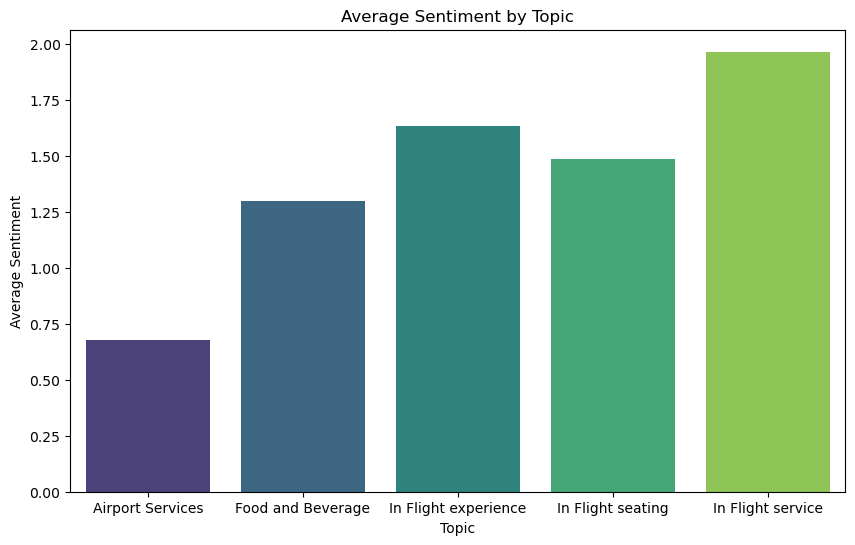

In [290]:
# Set up a plot
plt.figure(figsize=(10, 6))

# Create a bar plot for average sentiment by topic
sns.barplot(x='topic_label', y='sentiment', data= sentiment_by_label, palette='viridis')

# Add labels and title
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.savefig('Sentiment Across Topics.png')
plt.show()